# NOBEL PRIZE DATA ANALYSIS

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nobelprize_df = pd.read_csv('complete.csv')

In [3]:
nobelprize_df

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1972,Physics,The Nobel Prize in Physics,1,1/3,480000,3345725,NaN,received,for their jointly developed theory of supercon...,...,NaN,NaN,NaN,Individual,NaN,NaN,"University of Illinois, Urbana, IL, USA",NaN,NaN,NaN
946,1954,Chemistry,The Nobel Prize in Chemistry,1,1,181647,2640218,NaN,received,for his research into the nature of the chemic...,...,NaN,NaN,NaN,Individual,NaN,NaN,"California Institute of Technology (Caltech), ...",NaN,NaN,NaN
947,1911,Chemistry,The Nobel Prize in Chemistry,1,1,140695,7327865,NaN,received,in recognition of her services to the advancem...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Sorbonne University, Paris, France",NaN,NaN,NaN
948,1981,Peace,The Nobel Peace Prize,1,1,1000000,2929688,1981-10-14,received,for promoting the fundamental rights of refugees,...,Switzerland,Switzerland,"Geneva, Switzerland",Organization,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
nobelprize_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   awardYear                   950 non-null    int64 
 1   category                    950 non-null    object
 2   categoryFullName            950 non-null    object
 3   sortOrder                   950 non-null    int64 
 4   portion                     950 non-null    object
 5   prizeAmount                 950 non-null    int64 
 6   prizeAmountAdjusted         950 non-null    int64 
 7   dateAwarded                 533 non-null    object
 8   prizeStatus                 950 non-null    object
 9   motivation                  950 non-null    object
 10  categoryTopMotivation       20 non-null     object
 11  award_link                  950 non-null    object
 12  id                          950 non-null    int64 
 13  name                        950 non-null    object

In [5]:
#Data Cleaning
nobelprize_df.drop(columns=['categoryFullName','sortOrder','prizeStatus','motivation','categoryTopMotivation','award_link','knownName','givenName','familyName','fullName','penName','laureate_link','birth_cityNow','birth_countryNow','orgName','birth_locationString','death_city','death_cityNow','death_continent','death_country','death_countryNow','death_locationString','nativeName','acronym','org_founded_cityNow','org_founded_countryNow','org_founded_locationString','residence_1','residence_2','affiliation_1','affiliation_2','affiliation_3','affiliation_4','birth_city','org_founded_city'],inplace=True)

In [6]:
nobelprize_df.columns

Index(['awardYear', 'category', 'portion', 'prizeAmount',
       'prizeAmountAdjusted', 'dateAwarded', 'id', 'name', 'gender',
       'birth_date', 'birth_continent', 'birth_country', 'death_date',
       'org_founded_date', 'org_founded_continent', 'org_founded_country',
       'ind_or_org'],
      dtype='object')

In [7]:
nobelprize_df.shape

(950, 17)

In [10]:
nobelprize_df['gender']=nobelprize_df['gender'].replace(np.nan, 'organization')

In [11]:
nobelprize_df['gender'].isna().sum()

0

In [12]:
nobelprize_df.birth_date.fillna(nobelprize_df.org_founded_date, inplace=True)
del nobelprize_df['org_founded_date']

In [13]:
nobelprize_df['birth_date'].isna().sum()

1

In [14]:
nobelprize_df[nobelprize_df['birth_date'].isna()]

,awardYear,category,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,id,name,gender,birth_date,birth_continent,birth_country,death_date,org_founded_continent,org_founded_country,ind_or_org
617,2015,Peace,1,8000000,8384572,2015-10-09,925,National Dialogue Quartet,organization,NaN,NaN,NaN,NaN,NaN,NaN,Organization


In [15]:
nobelprize_df['birth_date']=nobelprize_df['birth_date'].replace(np.nan,'not specified')

In [16]:
nobelprize_df.birth_continent.fillna(nobelprize_df.org_founded_continent, inplace=True)
del nobelprize_df['org_founded_continent']

In [17]:
nobelprize_df['birth_continent']=nobelprize_df['birth_continent'].replace(np.nan,'not specified')

In [18]:
nobelprize_df.birth_country.fillna(nobelprize_df.org_founded_country, inplace=True)
del nobelprize_df['org_founded_country']

In [19]:
nobelprize_df['birth_country']=nobelprize_df['birth_country'].replace(np.nan,'not specified')

In [20]:
nobelprize_df['death_date']=nobelprize_df['death_date'].replace(np.nan,'not dead or organization')

In [21]:
nobelprize_df=nobelprize_df.rename(columns={"awardYear":"award_year", "portion":"share", "prizeAmount":"prize_amount", "prizeAmountAdjusted":"prize_amount_adjusted", "dateAwarded":"date_awarded","id":"laureate_id", "ind_or_org":"type"});

In [22]:
nobelprize_df['date_awarded']=nobelprize_df['date_awarded'].replace(np.nan,'not specified')

In [23]:
nobelprize_df

,award_year,category,share,prize_amount,prize_amount_adjusted,date_awarded,laureate_id,name,gender,birth_date,birth_continent,birth_country,death_date,type
0,2001,Economic Sciences,1/3,10000000,12295082,2001-10-10,745,A. Michael Spence,male,1943-00-00,North America,USA,not dead or organization,Individual
1,1975,Physics,1/3,630000,3404179,1975-10-17,102,Aage N. Bohr,male,1922-06-19,Europe,Denmark,2009-09-08,Individual
2,2004,Chemistry,1/3,10000000,11762861,2004-10-06,779,Aaron Ciechanover,male,1947-10-01,Asia,British Protectorate of Palestine,not dead or organization,Individual
3,1982,Chemistry,1,1150000,3102518,1982-10-18,259,Aaron Klug,male,1926-08-11,Europe,Lithuania,2018-11-20,Individual
4,1979,Physics,1/3,800000,2988048,1979-10-15,114,Abdus Salam,male,1926-01-29,Asia,India,1996-11-21,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1972,Physics,1/3,480000,3345725,not specified,66,John Bardeen,male,1908-05-23,North America,USA,1991-01-30,Individual
946,1954,Chemistry,1,181647,2640218,not specified,217,Linus Pauling,male,1901-02-28,North America,USA,1994-08-19,Individual
947,1911,Chemistry,1,140695,7327865,not specified,6,Marie Curie,female,1867-11-07,Europe,Russian Empire,1934-07-04,Individual
948,1981,Peace,1,1000000,2929688,1981-10-14,515,Office of the United Nations High Commissioner...,organization,1951-00-00,Europe,Switzerland,not dead or organization,Organization


In [24]:
nobelprize_df.isnull().sum()

award_year               0
category                 0
share                    0
prize_amount             0
prize_amount_adjusted    0
date_awarded             0
laureate_id              0
name                     0
gender                   0
birth_date               0
birth_continent          0
birth_country            0
death_date               0
type                     0
dtype: int64

In [25]:
nobelprize_df

,award_year,category,share,prize_amount,prize_amount_adjusted,date_awarded,laureate_id,name,gender,birth_date,birth_continent,birth_country,death_date,type
0,2001,Economic Sciences,1/3,10000000,12295082,2001-10-10,745,A. Michael Spence,male,1943-00-00,North America,USA,not dead or organization,Individual
1,1975,Physics,1/3,630000,3404179,1975-10-17,102,Aage N. Bohr,male,1922-06-19,Europe,Denmark,2009-09-08,Individual
2,2004,Chemistry,1/3,10000000,11762861,2004-10-06,779,Aaron Ciechanover,male,1947-10-01,Asia,British Protectorate of Palestine,not dead or organization,Individual
3,1982,Chemistry,1,1150000,3102518,1982-10-18,259,Aaron Klug,male,1926-08-11,Europe,Lithuania,2018-11-20,Individual
4,1979,Physics,1/3,800000,2988048,1979-10-15,114,Abdus Salam,male,1926-01-29,Asia,India,1996-11-21,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1972,Physics,1/3,480000,3345725,not specified,66,John Bardeen,male,1908-05-23,North America,USA,1991-01-30,Individual
946,1954,Chemistry,1,181647,2640218,not specified,217,Linus Pauling,male,1901-02-28,North America,USA,1994-08-19,Individual
947,1911,Chemistry,1,140695,7327865,not specified,6,Marie Curie,female,1867-11-07,Europe,Russian Empire,1934-07-04,Individual
948,1981,Peace,1,1000000,2929688,1981-10-14,515,Office of the United Nations High Commissioner...,organization,1951-00-00,Europe,Switzerland,not dead or organization,Organization


In [26]:
df2= pd.DataFrame({"award_year":[2020,2020,2020,2020,2020,2020,2020,2020,2020,2020],
"category":['Physiology or Medicine','Physiology or Medicine','Physiology or Medicine','Physics','Physics','Physics','Chemistry','Chemistry','Literature','Peace'],
"share":['1/3','1/3','1/3','1/2','1/4','1/4','1/2','1/2','1','1'],
"prize_amount":['not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified'],
"prize_amount_adjusted":['not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified'],
"date_awarded":['2020-10-05','2020-10-05','2020-10-05','2020-10-06','2020-10-06','2020-10-06','2020-10-07','2020-10-07','2020-10-08','2020-10-09'],
"laureate_id":['not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified'],
"name":['Michael Houghton','Harvey J. Alter','Charls M. Rice','Roger Penrose','Reinhard Genzel','Andrea M. Ghez','Jennifer Doudna','Emmanuelle Charpentier','Louise Glück','World Food Programme'],
"gender":['male','male','male','male','male','female','female','female','female','organization'],
"birth_date":['1949-00-00','1935-09-12','1952-08-25','1931-08-08','1952-03-24','1965-06-16','1964-02-19','1968-12-11','1943-04-22','1961-12-19'],
"birth_continent":['Europe','North America','North America','Europe','Europe','Europe','North America','Europe','North America','North America'],"birth_country":['United Kingdom','USA','USA','United Kingdom','Germany','USA','USA','France','USA','USA'],
"death_date":['not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization'],
"type":['Individual','Individual','Individual','Individual','Individual','Individual','Individual','Individual','Individual','Organization']})

In [27]:
nobelprize_df

,award_year,category,share,prize_amount,prize_amount_adjusted,date_awarded,laureate_id,name,gender,birth_date,birth_continent,birth_country,death_date,type
0,2001,Economic Sciences,1/3,10000000,12295082,2001-10-10,745,A. Michael Spence,male,1943-00-00,North America,USA,not dead or organization,Individual
1,1975,Physics,1/3,630000,3404179,1975-10-17,102,Aage N. Bohr,male,1922-06-19,Europe,Denmark,2009-09-08,Individual
2,2004,Chemistry,1/3,10000000,11762861,2004-10-06,779,Aaron Ciechanover,male,1947-10-01,Asia,British Protectorate of Palestine,not dead or organization,Individual
3,1982,Chemistry,1,1150000,3102518,1982-10-18,259,Aaron Klug,male,1926-08-11,Europe,Lithuania,2018-11-20,Individual
4,1979,Physics,1/3,800000,2988048,1979-10-15,114,Abdus Salam,male,1926-01-29,Asia,India,1996-11-21,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1972,Physics,1/3,480000,3345725,not specified,66,John Bardeen,male,1908-05-23,North America,USA,1991-01-30,Individual
946,1954,Chemistry,1,181647,2640218,not specified,217,Linus Pauling,male,1901-02-28,North America,USA,1994-08-19,Individual
947,1911,Chemistry,1,140695,7327865,not specified,6,Marie Curie,female,1867-11-07,Europe,Russian Empire,1934-07-04,Individual
948,1981,Peace,1,1000000,2929688,1981-10-14,515,Office of the United Nations High Commissioner...,organization,1951-00-00,Europe,Switzerland,not dead or organization,Organization


In [28]:
nobelprize_df=nobelprize_df.append(df2)

<ipython-input-28-cd55faae4116>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nobelprize_df=nobelprize_df.append(df2)


In [29]:
nobelprize_df

,award_year,category,share,prize_amount,prize_amount_adjusted,date_awarded,laureate_id,name,gender,birth_date,birth_continent,birth_country,death_date,type
0,2001,Economic Sciences,1/3,10000000,12295082,2001-10-10,745,A. Michael Spence,male,1943-00-00,North America,USA,not dead or organization,Individual
1,1975,Physics,1/3,630000,3404179,1975-10-17,102,Aage N. Bohr,male,1922-06-19,Europe,Denmark,2009-09-08,Individual
2,2004,Chemistry,1/3,10000000,11762861,2004-10-06,779,Aaron Ciechanover,male,1947-10-01,Asia,British Protectorate of Palestine,not dead or organization,Individual
3,1982,Chemistry,1,1150000,3102518,1982-10-18,259,Aaron Klug,male,1926-08-11,Europe,Lithuania,2018-11-20,Individual
4,1979,Physics,1/3,800000,2988048,1979-10-15,114,Abdus Salam,male,1926-01-29,Asia,India,1996-11-21,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,Physics,1/4,not specified,not specified,2020-10-06,not specified,Andrea M. Ghez,female,1965-06-16,Europe,USA,not dead or organization,Individual
6,2020,Chemistry,1/2,not specified,not specified,2020-10-07,not specified,Jennifer Doudna,female,1964-02-19,North America,USA,not dead or organization,Individual
7,2020,Chemistry,1/2,not specified,not specified,2020-10-07,not specified,Emmanuelle Charpentier,female,1968-12-11,Europe,France,not dead or organization,Individual
8,2020,Literature,1,not specified,not specified,2020-10-08,not specified,Louise Glück,female,1943-04-22,North America,USA,not dead or organization,Individual


In [30]:
nobelprize_df.to_csv('result.csv', index=None)

In [31]:
#Exploratory Data Analysis And Visualisation
nobelprize_df

,award_year,category,share,prize_amount,prize_amount_adjusted,date_awarded,laureate_id,name,gender,birth_date,birth_continent,birth_country,death_date,type
0,2001,Economic Sciences,1/3,10000000,12295082,2001-10-10,745,A. Michael Spence,male,1943-00-00,North America,USA,not dead or organization,Individual
1,1975,Physics,1/3,630000,3404179,1975-10-17,102,Aage N. Bohr,male,1922-06-19,Europe,Denmark,2009-09-08,Individual
2,2004,Chemistry,1/3,10000000,11762861,2004-10-06,779,Aaron Ciechanover,male,1947-10-01,Asia,British Protectorate of Palestine,not dead or organization,Individual
3,1982,Chemistry,1,1150000,3102518,1982-10-18,259,Aaron Klug,male,1926-08-11,Europe,Lithuania,2018-11-20,Individual
4,1979,Physics,1/3,800000,2988048,1979-10-15,114,Abdus Salam,male,1926-01-29,Asia,India,1996-11-21,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,Physics,1/4,not specified,not specified,2020-10-06,not specified,Andrea M. Ghez,female,1965-06-16,Europe,USA,not dead or organization,Individual
6,2020,Chemistry,1/2,not specified,not specified,2020-10-07,not specified,Jennifer Doudna,female,1964-02-19,North America,USA,not dead or organization,Individual
7,2020,Chemistry,1/2,not specified,not specified,2020-10-07,not specified,Emmanuelle Charpentier,female,1968-12-11,Europe,France,not dead or organization,Individual
8,2020,Literature,1,not specified,not specified,2020-10-08,not specified,Louise Glück,female,1943-04-22,North America,USA,not dead or organization,Individual


In [32]:
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (30, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style("darkgrid")

## Nobel Prize Winners in Each Year

In [33]:
year_df = nobelprize_df.groupby('award_year')[['laureate_id']].count()
year_df = year_df.sort_values('laureate_id', ascending=False).reset_index()
year_df.rename(columns = { 'award_year':'year','laureate_id':'number_of_laureate'}, inplace = True)

In [34]:
year_df

,year,number_of_laureate
0,2001,15
1,2019,14
2,2002,13
3,2013,13
4,2005,13
...,...,...
112,1915,4
113,1924,3
114,1914,3
115,1918,2


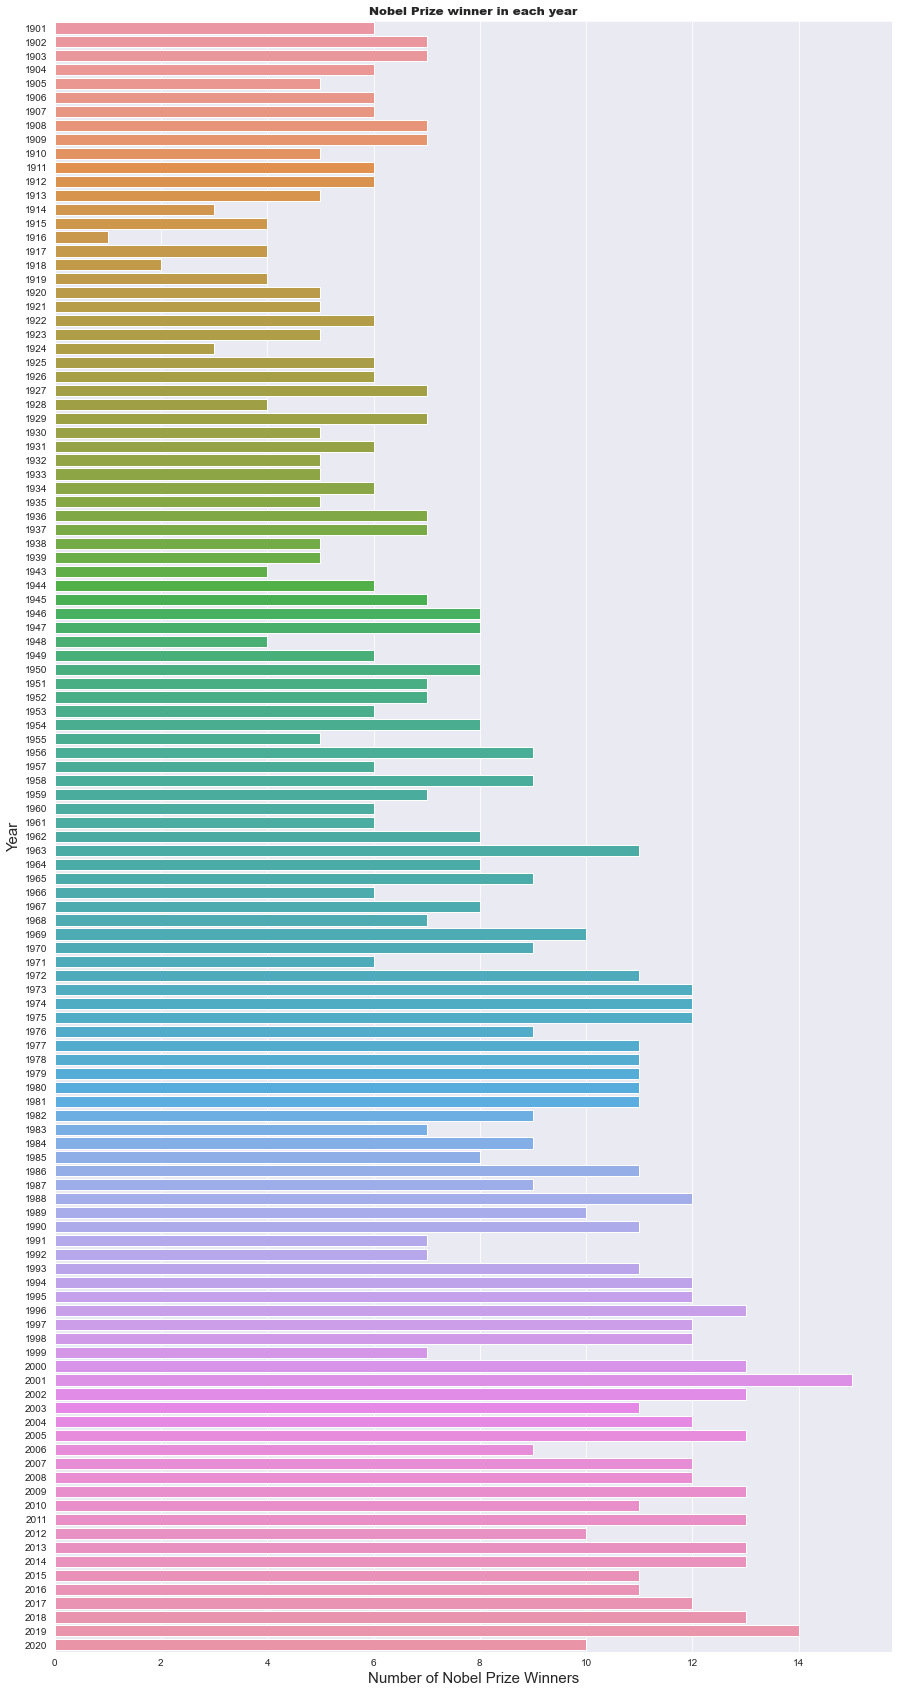

In [35]:
plt.figure(figsize=(15,30))
plt.title('Nobel Prize winner in each year',fontweight=800)
sns.barplot(x='number_of_laureate', y='year', orient='h', data=year_df);
plt.ylabel('Year', size=15)
plt.xlabel('Number of Nobel Prize Winners', size=15);

## Nobel Prize Winners in Each Category

In [104]:
category_df=nobelprize_df.groupby('category')[['laureate_id']].count()
category_df=category_df.sort_values('laureate_id', ascending=False).reset_index()
category_df.rename(columns = { 'laureate_id': 'number_of_laureate'}, inplace = True)

In [105]:
category_df

,category,number_of_laureate
0,Physiology or Medicine,222
1,Physics,216
2,Chemistry,186
3,Peace,135
4,Literature,117
5,Economic Sciences,84


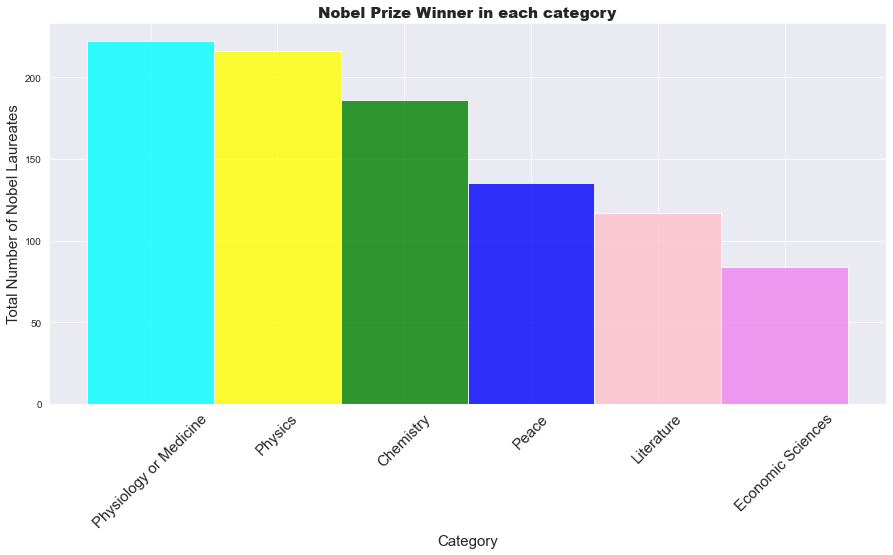

In [106]:
plt.figure(figsize=(15,7))
plt.title('Nobel Prize Winner in each category', fontweight=800, fontsize=15)
plt.xlabel('Category', size=15)
plt.ylabel('Total Number of Nobel Laureates', size=15)
plt.xticks(rotation=45, size=15)
plt.bar(x=category_df.category, height=category_df.number_of_laureate, width=1, color=['cyan','yellow','green','blue','pink','violet'], alpha=0.8);

## Nobel Prize Winners by Country

In [107]:
country_df=nobelprize_df.groupby('birth_country')[['laureate_id']].count()
country_df=country_df.sort_values('laureate_id', ascending=False).reset_index()
country_df.rename(columns = { 'birth_country':'country','laureate_id':'number_of_laureate'}, inplace = True)

In [108]:
country_df

,country,number_of_laureate
0,USA,287
1,United Kingdom,91
2,Germany,78
3,France,56
4,Sweden,29
...,...,...
92,Madagascar,1
93,Mecklenburg,1
94,Morocco,1
95,Nigeria,1


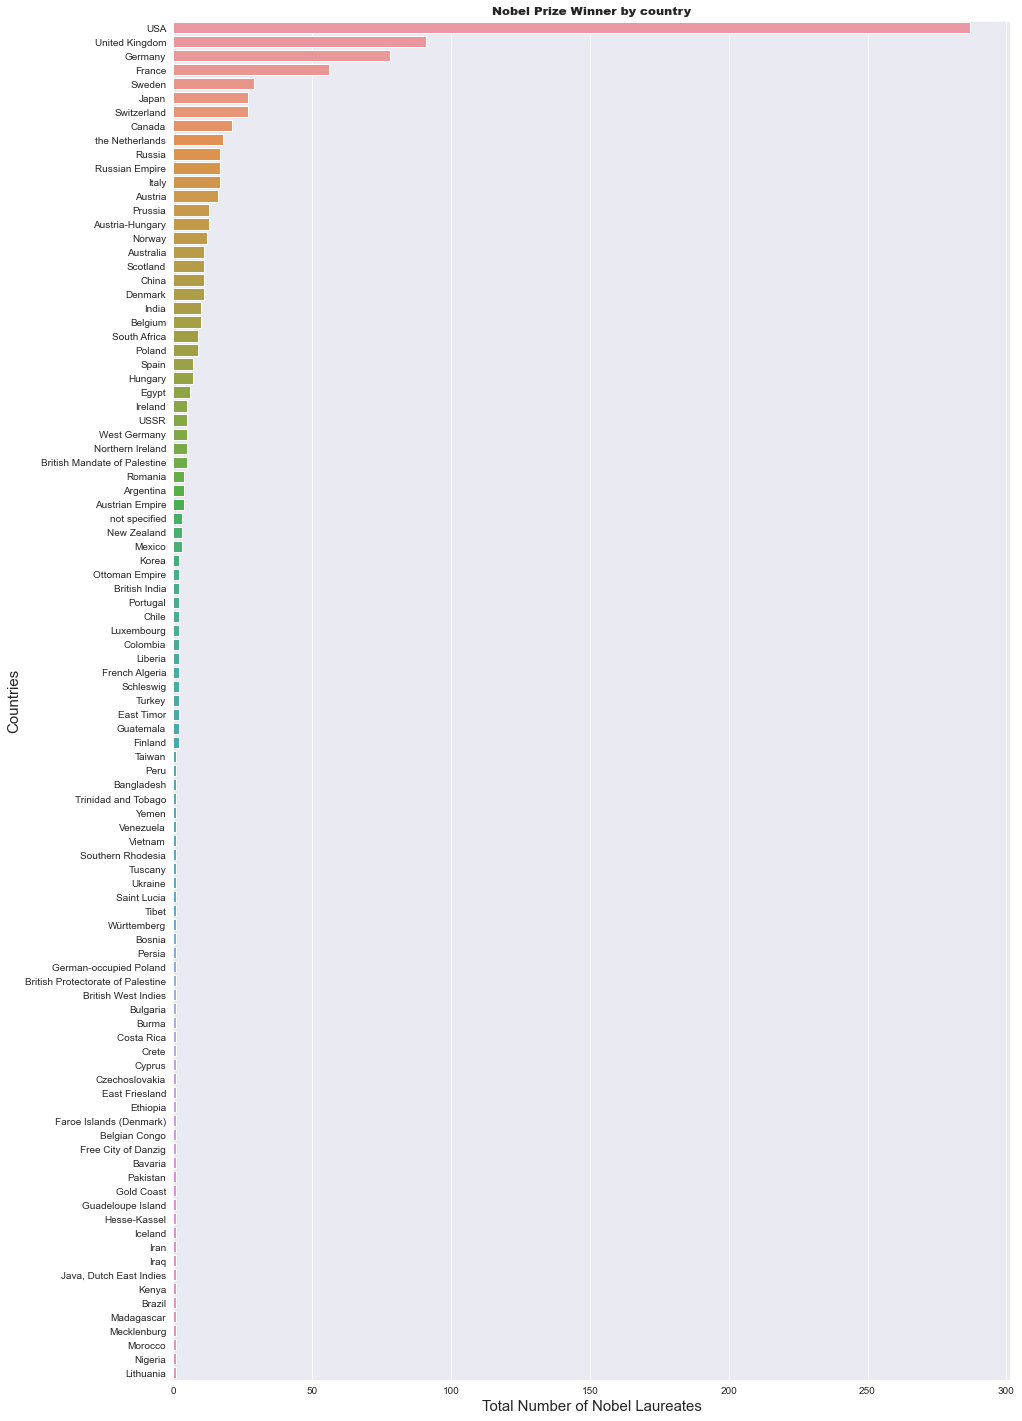

In [109]:
plt.figure(figsize=(15,25))
plt.title('Nobel Prize Winner by country', fontweight=800)
sns.barplot(y='country', x='number_of_laureate', orient='h', data=country_df)
plt.ylabel('Countries', size=15)
plt.xlabel('Total Number of Nobel Laureates', size=15);

## Nobel Prize winners by Continent

In [110]:
continent_df=nobelprize_df.groupby('birth_continent')[['laureate_id']].count()
continent_df=continent_df.sort_values('laureate_id', ascending=False).reset_index()
continent_df.rename(columns = {'birth_continent':'continent','laureate_id':'number_of_laureate'}, inplace = True)

In [111]:
continent_df

,continent,number_of_laureate
0,Europe,513
1,North America,317
2,Asia,73
3,Africa,27
4,Oceania,16
5,South America,11
6,not specified,3


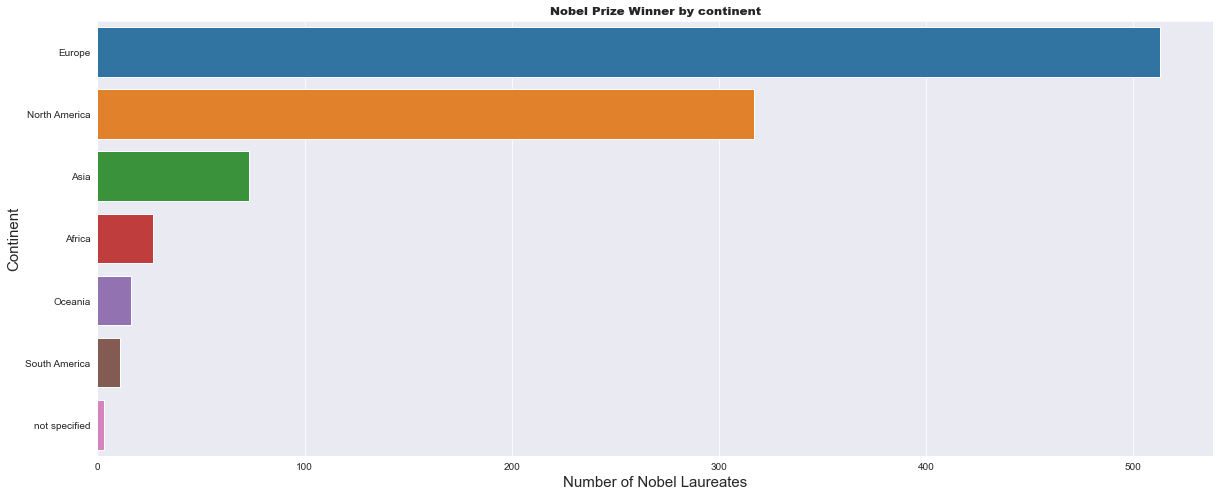

In [112]:
plt.figure(figsize=(20,8))
plt.title('Nobel Prize Winner by continent', fontweight=800)
sns.barplot(y='continent', x='number_of_laureate', orient='h', data=continent_df)
plt.ylabel('Continent', size=15)
plt.xlabel('Number of Nobel Laureates', size=15);

### Q1. What is the number of male and female nobel laureates in the top 20 countries ?

In [113]:
top_df = nobelprize_df.groupby(['birth_country','gender'])['gender'].count().reset_index(name='count')

In [114]:
top_df

,birth_country,gender,count
0,Argentina,male,4
1,Australia,female,1
2,Australia,male,9
3,Australia,organization,1
4,Austria,female,1
...,...,...,...
123,West Germany,male,5
124,Württemberg,male,1
125,Yemen,female,1
126,not specified,organization,3


In [115]:
male_df = top_df[top_df['gender']==('male')]
male_df = male_df.sort_values('count',ascending=False).head(20)

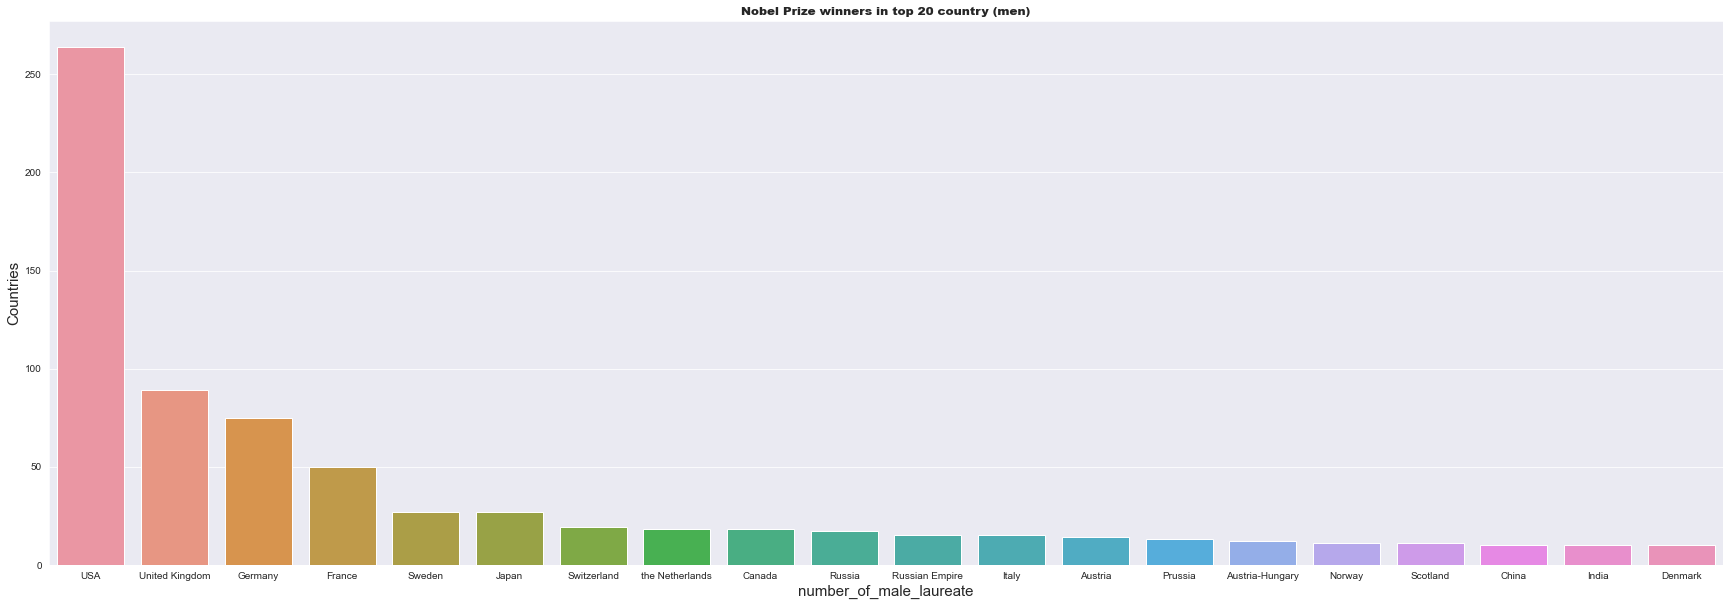

In [116]:
plt.figure(figsize=(30,10))
plt.title('Nobel Prize winners in top 20 country (men)', fontweight=800)
sns.barplot(x='birth_country', y='count', orient='v', data=male_df)
plt.ylabel('Countries', size=15)
plt.xlabel('number_of_male_laureate', size=15);

In [117]:
female_df = top_df[top_df['gender']==('female')]
female_df = female_df.sort_values('count',ascending=False).head(20)

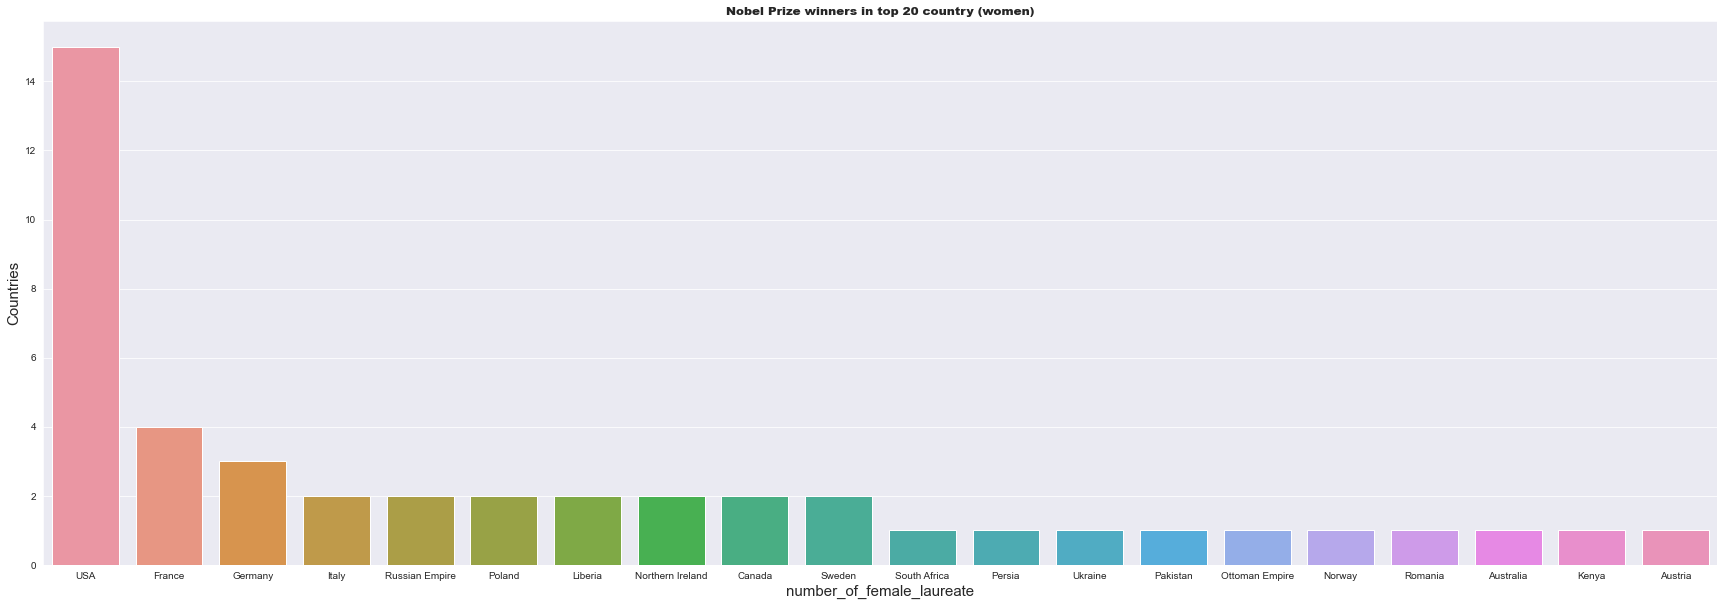

In [118]:
plt.figure(figsize=(30,10))
plt.title('Nobel Prize winners in top 20 country (women)', fontweight=800)
sns.barplot(x='birth_country', y='count', orient='v', data=female_df)
plt.ylabel('Countries', size=15)
plt.xlabel('number_of_female_laureate', size=15);

### Q2. How many nobel prize winner are share or not share there nobel prize with other person ?

In [119]:
share_df = nobelprize_df.groupby('share')['share'].count().reset_index(name = 'count')

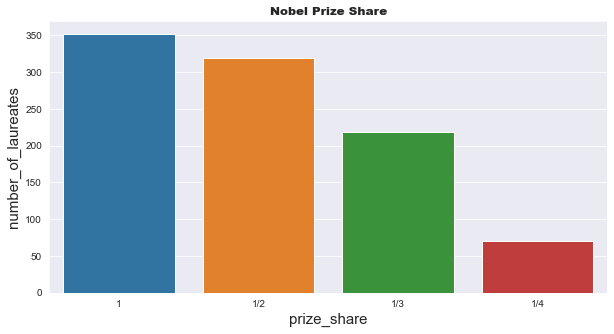

In [120]:
plt.figure(figsize=(10,5))
plt.title('Nobel Prize Share', fontweight=800)
sns.barplot(x='share', y='count', orient='v', data=share_df)
plt.ylabel('number_of_laureates', size=15)
plt.xlabel('prize_share', size=15);

### Q3. Who is the first male, female and organization that got the nobel prize first time ?


In [121]:
female = nobelprize_df[nobelprize_df.gender == 'female'].nsmallest(1, 'award_year')
male = nobelprize_df[nobelprize_df.gender == 'male'].nsmallest(1, 'award_year')
organization = nobelprize_df[nobelprize_df.gender == 'organization'].nsmallest(1, 'award_year')

In [122]:
female[['name','category','gender']]

,name,category,gender
566,Marie Curie,Physics,female


In [123]:
male[['name','category','gender']]

,name,category,gender
211,Emil von Behring,Physiology or Medicine,male


In [124]:
organization[['name','category','gender']]

,name,category,gender
386,Institute of International Law,Peace,organization


### Q4. How many nobel laureates got Nobel Prize more than one time ?

In [125]:
more_df=nobelprize_df.groupby('name').filter(lambda group: len(group) >= 2)

In [126]:
more_df=more_df.groupby('name')[['laureate_id']].count().reset_index()
more_df.rename(columns = {'laureate_id':'times_got'}, inplace = True)

In [127]:
more_df.sort_values('times_got', ascending=False)

,name,times_got
1,International Committee of the Red Cross,3
0,Frederick Sanger,2
2,John Bardeen,2
3,Linus Pauling,2
4,Marie Curie,2
5,Office of the United Nations High Commissioner...,2


### Q5. What percent of male, female and organization got the nobel prize ?

In [128]:
nobelprize_df.groupby(['gender'])['gender'].count().reset_index(name='count')

,gender,count
0,female,58
1,male,874
2,organization,28


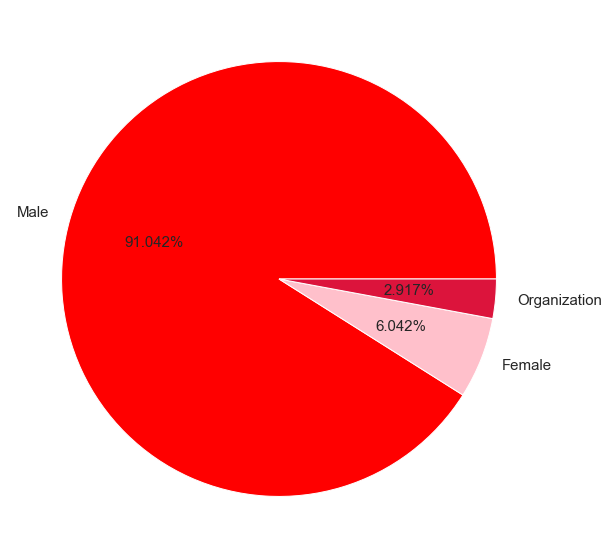

In [129]:
plt.figure(figsize=(10,10))
Female = nobelprize_df['gender'].value_counts()['female']
Male = nobelprize_df['gender'].value_counts()['male']
Organization = nobelprize_df['gender'].value_counts()['organization']
plt.pie([Male, Female, Organization], labels = ['Male', 'Female', 'Organization'], colors=['red','pink','crimson'], autopct='%1.3f%%', textprops={'size':'15'});

### Q6. How many nobel laureates are not longer between us (i.e.,dead) ?

In [130]:
dead_df = nobelprize_df[nobelprize_df.death_date != 'not dead or organization'].count()

In [131]:
print('There are {} nobel laureate who are not longer between us.'.format(dead_df.laureate_id.sum()))

There are 630 nobel laureate who are not longer between us.
